## 1. Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import acquire
from scipy import stats
import os
from env import get_connection
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
def get_titanic_data():

    if os.path.isfile('titanic.csv'):
        
        return pd.read_csv('titanic.csv')
    
    else:
       
        url = get_connection('titanic_db')
        
        query = '''
        SELECT *
        FROM passengers 
        '''

        df = pd.read_sql(query, url)
        
        df.to_csv('titanic.csv')

        return df  

In [3]:
titanic_df = get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


## 2. Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [4]:
def get_iris_data():

    if os.path.isfile('iris_df.csv'):
        
        return pd.read_csv('iris_df.csv')
    
    else:
       
        url = get_connection('iris_db')
        
        query = '''
        SELECT *
        FROM species
        JOIN measurements
        USING(species_id); 
        '''

        df = pd.read_sql(query, url)
        
        df.to_csv('iris_df.csv')

        return df  

In [5]:
iris_df = get_iris_data()
iris_df.head()

,Unnamed: 0,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,1,setosa,2,4.9,3.0,1.4,0.2
2,2,1,setosa,3,4.7,3.2,1.3,0.2
3,3,1,setosa,4,4.6,3.1,1.5,0.2
4,4,1,setosa,5,5.0,3.6,1.4,0.2


## 3. Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join contract_types, internet_service_types, payment_types tables with the customers table, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database.

In [6]:
def get_telco_data():

    if os.path.isfile('telco.csv'):
        
        return pd.read_csv('telco.csv')
    
    else:
       
        url = get_connection('telco_churn')
        
        query = '''
        SELECT *
        FROM customers
        JOIN contract_types USING(contract_type_id)
        JOIN internet_service_types USING(internet_service_type_id)
        JOIN payment_types USING(payment_type_id);
        '''

        df = pd.read_sql(query, url)
        
        df.to_csv('telco.csv')

        return df  

In [7]:
telco_df = get_telco_data()
telco_df.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


## 4. Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [8]:
import acquire

In [9]:
acquire.get_titanic_data()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [10]:
acquire.get_iris_data()

,Unnamed: 0,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,1,setosa,2,4.9,3.0,1.4,0.2
2,2,1,setosa,3,4.7,3.2,1.3,0.2
3,3,1,setosa,4,4.6,3.1,1.5,0.2
4,4,1,setosa,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...,...,...
145,145,3,virginica,146,6.7,3.0,5.2,2.3
146,146,3,virginica,147,6.3,2.5,5.0,1.9
147,147,3,virginica,148,6.5,3.0,5.2,2.0
148,148,3,virginica,149,6.2,3.4,5.4,2.3


In [11]:
acquire.get_telco_data()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,2,1,2,9987-LUTYD,Female,0,No,No,13,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,7040,2,1,1,9992-UJOEL,Male,0,No,No,2,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


# Data Preparation 

## Using the Iris Data:

1. Use the function defined in acquire.py to load the iris data.

2. Drop the species_id and measurement_id columns.

3. Rename the species_name column to just species.

4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [12]:
iris_data = acquire.get_iris_data()
iris_data.head()

,Unnamed: 0,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,1,setosa,2,4.9,3.0,1.4,0.2
2,2,1,setosa,3,4.7,3.2,1.3,0.2
3,3,1,setosa,4,4.6,3.1,1.5,0.2
4,4,1,setosa,5,5.0,3.6,1.4,0.2


In [13]:
iris_data = iris_data.drop(columns = ['species_id', 'measurement_id'])

In [14]:
iris_data = iris_data.rename(columns={'species_name':'species'})
iris_data

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width
0,0,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,2,setosa,4.7,3.2,1.3,0.2
3,3,setosa,4.6,3.1,1.5,0.2
4,4,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...
145,145,virginica,6.7,3.0,5.2,2.3
146,146,virginica,6.3,2.5,5.0,1.9
147,147,virginica,6.5,3.0,5.2,2.0
148,148,virginica,6.2,3.4,5.4,2.3


In [15]:
dummies = pd.get_dummies(iris_data['species'], drop_first=True)
iris_data = pd.concat([iris_data, dummies], axis = 1)


In [16]:
def prep_iris(iris_data):
    
    iris_data = iris_data.drop(columns = ['species_id', 'measurement_id'])
    
    iris_data = iris_data.rename(columns={'species_name':'species'})

    dummies = pd.get_dummies(iris_data['species'], drop_first=True)
    
    iris_data = pd.concat([iris_data, dummies], axis = 1)
    
    return iris_data

In [17]:
prep_iris(acquire.get_iris_data())

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,0,setosa,5.1,3.5,1.4,0.2,0,0
1,1,setosa,4.9,3.0,1.4,0.2,0,0
2,2,setosa,4.7,3.2,1.3,0.2,0,0
3,3,setosa,4.6,3.1,1.5,0.2,0,0
4,4,setosa,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...,...,...
145,145,virginica,6.7,3.0,5.2,2.3,0,1
146,146,virginica,6.3,2.5,5.0,1.9,0,1
147,147,virginica,6.5,3.0,5.2,2.0,0,1
148,148,virginica,6.2,3.4,5.4,2.3,0,1


## Using the Titanic dataset

1. Use the function defined in acquire.py to load the Titanic data.

2. Drop any unnecessary, unhelpful, or duplicated columns.

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.



In [18]:
titanic_df = acquire.get_titanic_data()

In [19]:
titanic_df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [20]:
titanic_df = titanic_df.drop(columns=['passenger_id','embarked','class', 'age','deck'])
titanic_df.head()


,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1


In [21]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   embark_town  889 non-null    object 
 7   alone        891 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [22]:
dummy_df = pd.get_dummies(titanic_df[['sex','embark_town']], drop_first= True)
dummy_df.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [23]:
titanic_df = pd.concat([titanic_df, dummy_df], axis=1)
titanic_df.head()


,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [24]:
titanic_df.isna().sum()

survived                   0
pclass                     0
sex                        0
sibsp                      0
parch                      0
fare                       0
embark_town                2
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [25]:
titanic_df['embark_town'].fillna('Southampton', inplace = True)


In [26]:
def prep_titantic(titanic_df):
    
    titanic_df = titanic_df.drop(columns=['passenger_id','embarked','class', 'age','deck'])
    
    titanic_df['embark_town'].fillna('Southampton', inplace = True)
    
    dummies = pd.get_dummies(titanic_df[['sex', 'embark_town']], drop_first = True)
    
    titanic_df = pd.concat([titanic_df, dummies], axis = 1)
    
    return titanic_df

In [27]:
prep_titantic(acquire.get_titanic_data())

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


## Using the Telco dataset

1. Use the function defined in acquire.py to load the Telco data.

2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [28]:
telco_df = acquire.get_telco_data()
telco_df

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,2,1,2,9987-LUTYD,Female,0,No,No,13,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,7040,2,1,1,9992-UJOEL,Male,0,No,No,2,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [29]:
telco_df.columns.to_list()

['Unnamed: 0',
 'payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [30]:
telco_df = telco_df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'Unnamed: 0'])

In [31]:
telco_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [32]:
telco_df['gender_encoded'] = telco_df.gender.map({'Female': 1, 'Male': 0})

telco_df['partner_encoded'] = telco_df.partner.map({'Yes': 1, 'No': 0})

telco_df['dependents_encoded'] = telco_df.dependents.map({'Yes': 1, 'No': 0})

telco_df['phone_service_encoded'] = telco_df.phone_service.map({'Yes': 1, 'No': 0})

telco_df['paperless_billing_encoded'] = telco_df.paperless_billing.map({'Yes': 1, 'No': 0})

telco_df['churn_encoded'] = telco_df.churn.map({'Yes': 1, 'No': 0})


In [33]:
telco_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,No,One year,DSL,Mailed check,1,1,1,1,1,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,No,One year,DSL,Mailed check,1,0,0,1,0,0
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,No,Month-to-month,DSL,Mailed check,0,0,0,1,1,0
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,No,Two year,DSL,Mailed check,0,1,1,1,0,0


In [34]:
telco_df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'gender_encoded', 'partner_encoded',
       'dependents_encoded', 'phone_service_encoded',
       'paperless_billing_encoded', 'churn_encoded'],
      dtype='object')

In [35]:
dummy_df = pd.get_dummies(telco_df[['multiple_lines', 'online_security', 
                              'online_backup', 'device_protection', 
                              'tech_support', 'streaming_tv',   'streaming_movies',
                              'contract_type', 'internet_service_type', 'payment_type']],
                              drop_first=True)
dummy_df.head()

,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1


In [36]:
telco_df = pd.concat([telco_df, dummy_df], axis = 1)
telco_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,0,0,0,1,0,0,0,0,0,1
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,0,0,1,0,0,1,0,0,1,0
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,0,0,0,0,0,0,0,0,0,1
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,0,0,1,0,1,0,0,0,0,1


In [37]:
def prep_telco(telco_df):
    
    telco_df = telco_df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'Unnamed: 0'])
    
    telco_df['gender_encoded'] = telco_df.gender.map({'Female': 1, 'Male': 0})

    telco_df['partner_encoded'] = telco_df.partner.map({'Yes': 1, 'No': 0})

    telco_df['dependents_encoded'] = telco_df.dependents.map({'Yes': 1, 'No': 0})

    telco_df['phone_service_encoded'] = telco_df.phone_service.map({'Yes': 1, 'No': 0})

    telco_df['paperless_billing_encoded'] = telco_df.paperless_billing.map({'Yes': 1, 'No': 0})

    telco_df['churn_encoded'] = telco_df.churn.map({'Yes': 1, 'No': 0})
    
    
    dummy_df = pd.get_dummies(telco_df[['multiple_lines', 'online_security', 
                              'online_backup', 'device_protection', 
                              'tech_support', 'streaming_tv',   'streaming_movies',
                              'contract_type', 'internet_service_type', 'payment_type']],
                              drop_first=True)
    
    
    telco_df = pd.concat([telco_df, dummy_df], axis = 1)
    
    return telco_df

In [38]:
prep_telco(acquire.get_telco_data())

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,0,0,0,1,0,0,0,0,0,1
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,0,0,1,0,0,1,0,0,1,0
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,0,0,0,0,0,0,0,0,0,1
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,0,0,1,0,1,0,0,0,0,1


# Split Your Data

1. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [39]:
def train_val_test(df,col):
    seed = 42
    
    train,val_test = train_test_split(df, train_size = 0.7, random_state = seed, stratify = df[col])
    
    validate, test = train_test_split(val_test, train_size = 0.5, random_state = seed, stratify = val_test[col])
    
    return train, validate, test

2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

In [40]:
iris_data.head()

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,0,setosa,5.1,3.5,1.4,0.2,0,0
1,1,setosa,4.9,3.0,1.4,0.2,0,0
2,2,setosa,4.7,3.2,1.3,0.2,0,0
3,3,setosa,4.6,3.1,1.5,0.2,0,0
4,4,setosa,5.0,3.6,1.4,0.2,0,0


In [47]:
col = 'species'

In [48]:
train_iris, validate_iris, test_iris = train_val_test(iris_data, col)

In [ ]:
print(train_iris.shape) 
print(validate_iris.shape)
print(test_iris.shape)

In [ ]:
iris_data.shape

3. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [ ]:
titanic_df.head()

In [ ]:
col = 'embark_town'

In [ ]:
train_titanic, validate_titanic, test_titanic = train_val_test(titanic_df, col)

In [ ]:
print(train_titanic.shape)
print(validate_titanic.shape)
print(test_titanic.shape)

In [ ]:
titanic_df.shape

4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [ ]:
telco_df.columns[telco_df.columns.str.contains('chu')]

In [ ]:
col = 'churn'

In [ ]:
train_telco, validate_telco, test_telco = train_val_test(telco_df, col)

In [ ]:
print(train_telco.shape)
print(validate_telco.shape)
print(test_telco.shape)

In [ ]:
telco_df.shape

In [ ]:
train_telco

# Part 1 Exploratory Data

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

1. Acquire, prepare & split your data.

In [43]:
iris = acquire.get_iris_data()
iris

,Unnamed: 0,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,1,setosa,2,4.9,3.0,1.4,0.2
2,2,1,setosa,3,4.7,3.2,1.3,0.2
3,3,1,setosa,4,4.6,3.1,1.5,0.2
4,4,1,setosa,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...,...,...
145,145,3,virginica,146,6.7,3.0,5.2,2.3
146,146,3,virginica,147,6.3,2.5,5.0,1.9
147,147,3,virginica,148,6.5,3.0,5.2,2.0
148,148,3,virginica,149,6.2,3.4,5.4,2.3


In [55]:
df = prep_iris(iris)
df = df.drop(columns= ['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       150 non-null    object 
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   versicolor    150 non-null    uint8  
 6   virginica     150 non-null    uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 6.3+ KB


In [58]:
col = 'species'
train, validate, test = train_val_test(df, col)
train.shape, validate.shape, test.shape

((105, 7), (22, 7), (23, 7))

## 2. Univariate Stats

 - For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

 - For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

 - Document takeaways & any actions.

In [59]:
num_vars = df.select_dtypes(include = ['float64'])
cat_vars = df.select_dtypes(include= ['object', 'uint8'])

In [68]:
num_vars.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [70]:
num_vars.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


sepal_length


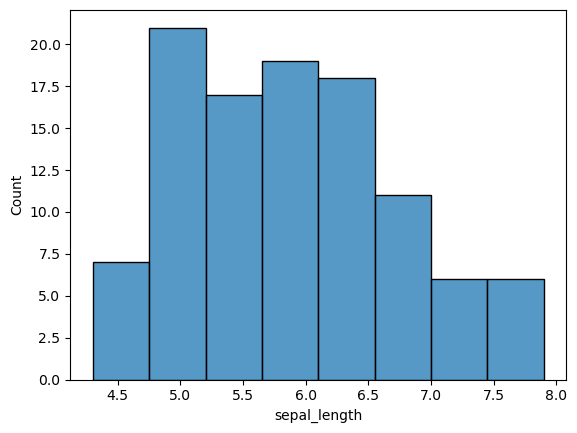

sepal_width


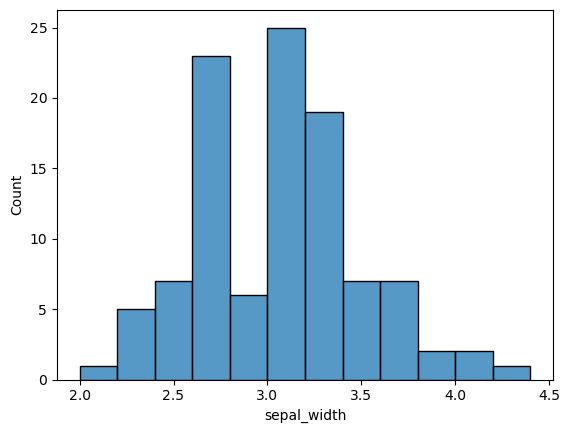

petal_length


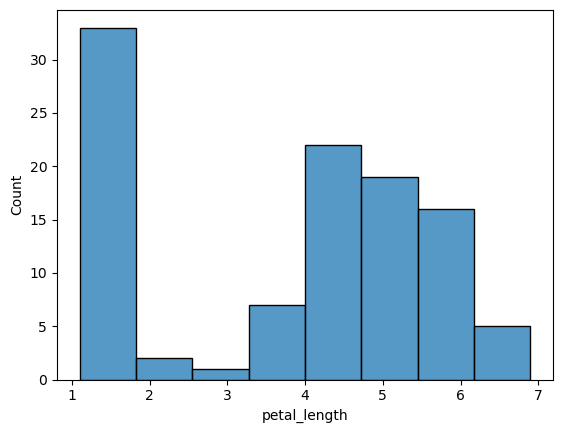

petal_width


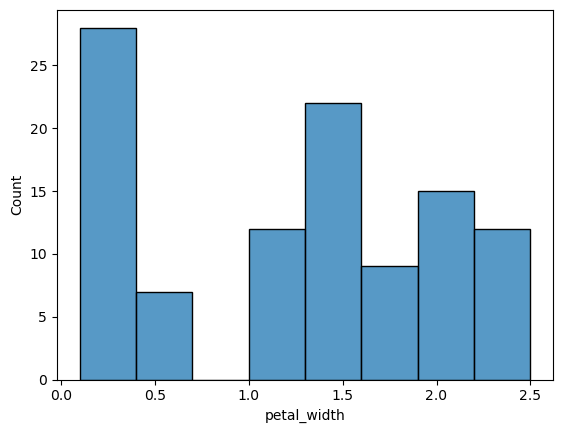

In [63]:
for col in num_vars:
    print(col)
    sns.histplot(x=col, data = train)
    plt.show()

sepal_length


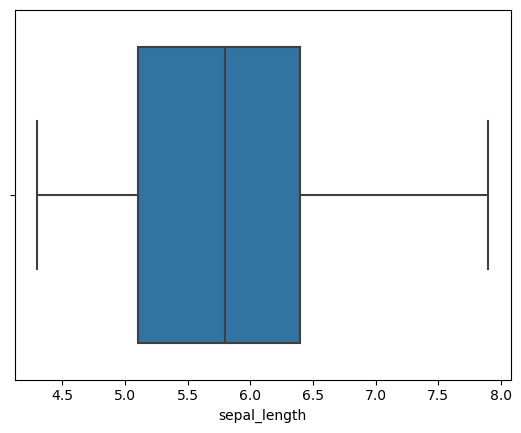

sepal_width


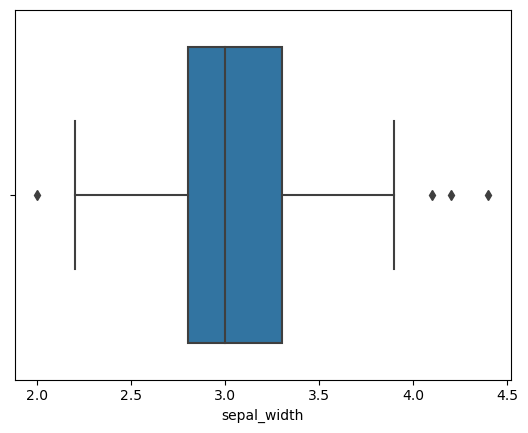

petal_length


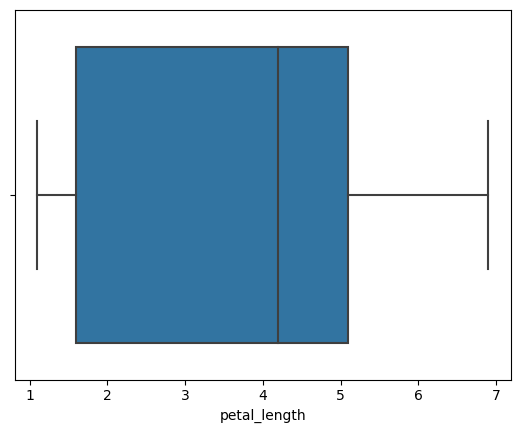

petal_width


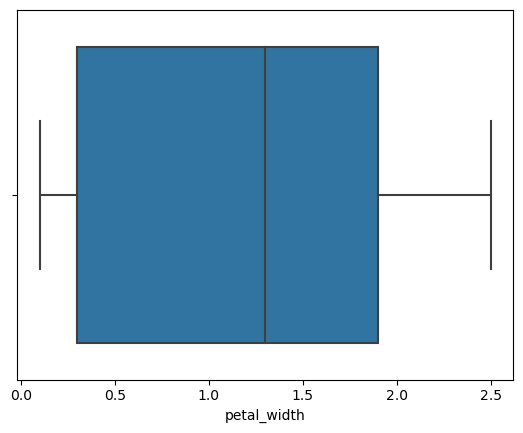

In [71]:
for col in num_vars:
    print(col)
    sns.boxplot(x=col, data = train)
    plt.show()

species
versicolor    35
setosa        35
virginica     35
Name: species, dtype: int64
versicolor    33.333333
setosa        33.333333
virginica     33.333333
Name: species, dtype: float64


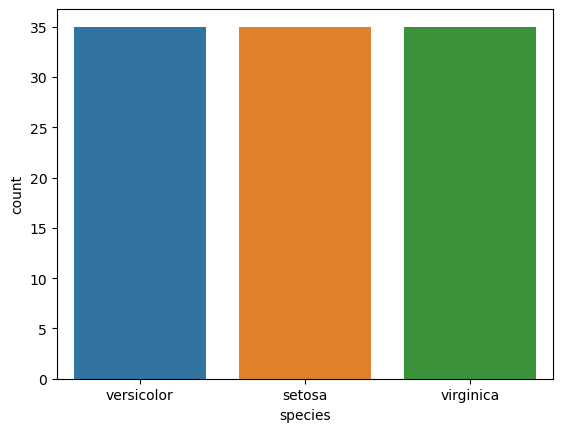

versicolor
0    70
1    35
Name: versicolor, dtype: int64
0    66.666667
1    33.333333
Name: versicolor, dtype: float64


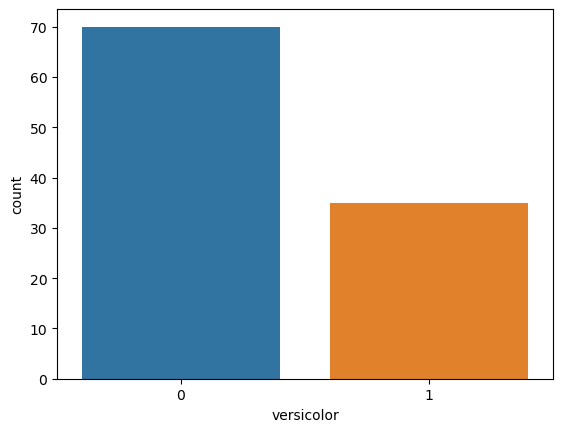

virginica
0    70
1    35
Name: virginica, dtype: int64
0    66.666667
1    33.333333
Name: virginica, dtype: float64


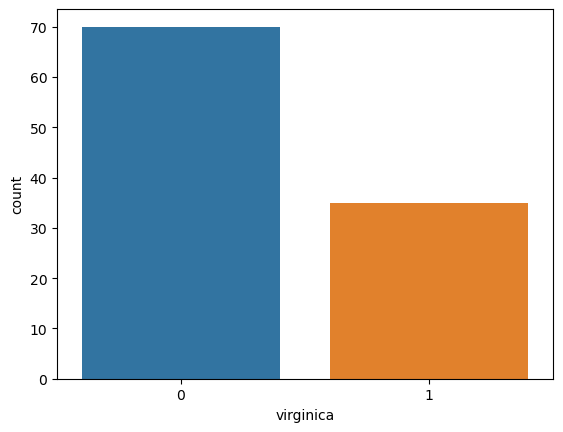

In [60]:
for col in at_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize = True) * 100)
    sns.countplot(x=col, data = train)
    plt.show()

species


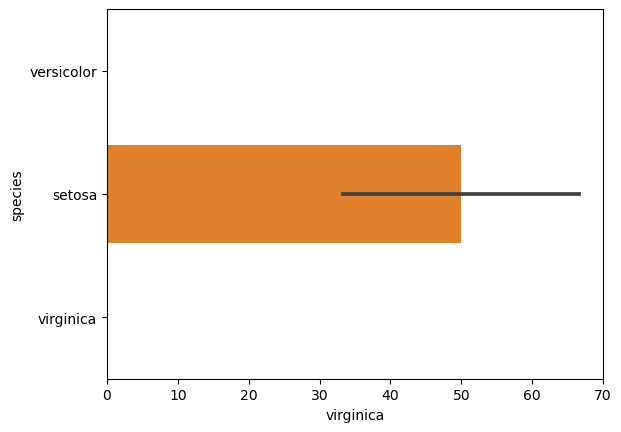

versicolor


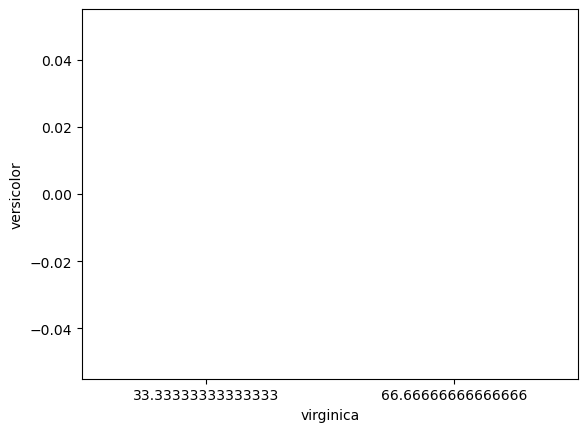

virginica


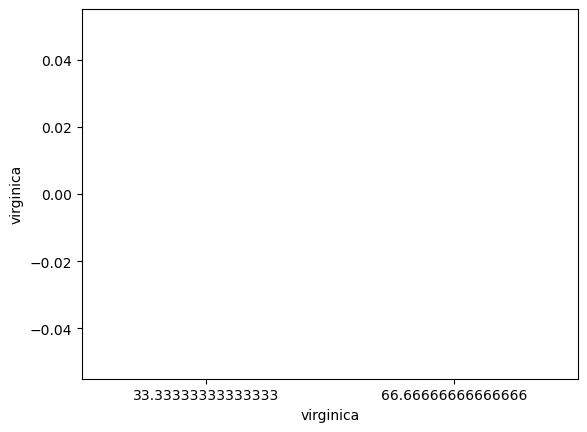

In [77]:
for col in cat_vars:
    print(col)
    sns.barplot(x = x, y = col, data = train)
    plt.show()

In [74]:
train[col].value_counts(normalize = True) * 100

versicolor    33.333333
setosa        33.333333
virginica     33.333333
Name: species, dtype: float64